#### Mandatory Project on Diabetes Dataset.
- Introduction

Changes in the life style of people due to urbanization and several other factors leads to the increase in the number of diabetes patients. This disease is a challenge to the health care sector as it's difficult to cure a patient completely, if once he got affected.

Major factors associated with the diabetes are:

1)Are overweight.

2) Are 45 years or older. Have a parent, brother, or sister with type 2 diabetes.

3) Are physically active less than 3 times a week.

4) Have ever had gestational diabetes (diabetes during pregnancy) or given birth to a baby who weighed over 9 pounds.

### Aim: To find the major factors associated with the diabetes in women.

#### Given dataset
This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

Variables used in the dataset

 Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test. **(155 mg/dL or lower - normal, otherwise - prediabetes)**

 Blood Pressure: Diastolic blood pressure (mm Hg) **(60 to 80 - normal, otherwise - Hypotension and Hypertension)**

Skin Thickness: Triceps skin fold thickness (mm) **(Average value is 23.6 ± 7.5 mm for women)**

 Insulin: 2-Hour serum insulin (mu U/ml) **( 16-166 mIU/L or mu U/ml is considered normal )**

 BMI: Body mass index (weight in kg/(height in m)^2) **(< 18.5	Underweight, 18.5—24.9	Healthy Weight, 25.0—29.9	Overweight, > 30.0 Obesity)**

Diabetes Pedigree Function: Diabetes pedigree function **(indicates the function which scores likelihood of diabetes based on family history)**

Age: Age (years)

Outcome: Class variable (0 or 1) **0 mean non-diabetic and 1 means diabetic**



In [572]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as no

In [573]:
# Reading the given dataset 
diabetes = pd.read_excel("pima-indians-diabetes (2).xlsx", header= None)
diabetes

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [574]:
# Giving names for the columns
diabetes.columns = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome']

In [575]:
# To know about basic information of the dataset.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    float64
 1   Glucose                     768 non-null    float64
 2   Blood Pressure              768 non-null    float64
 3   Skin Thickness              768 non-null    float64
 4   Insulin                     768 non-null    float64
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    float64
 8   Outcome                     768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [576]:
# To see few statistical measures of the given data
diabetes.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [577]:
# To find number of unique values in all the columns
diabetes.nunique()

Pregnancies                    17
Glucose                       136
Blood Pressure                 47
Skin Thickness                 51
Insulin                       186
BMI                           248
Diabetes Pedigree Function    517
Age                            52
Outcome                         2
dtype: int64

In [578]:
# To find the percentage of null values 
diabetes.isnull().mean() * 100

Pregnancies                   0.0
Glucose                       0.0
Blood Pressure                0.0
Skin Thickness                0.0
Insulin                       0.0
BMI                           0.0
Diabetes Pedigree Function    0.0
Age                           0.0
Outcome                       0.0
dtype: float64

In [579]:
# No duplicates were found
diabetes[diabetes.duplicated() == True]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome


#### Examinig the distributions of all the variables

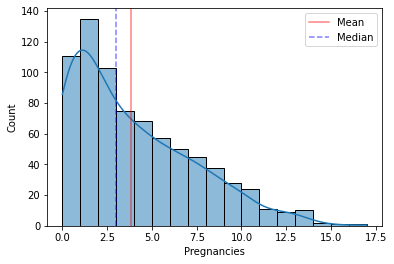

In [580]:
sns.histplot(data = diabetes['Pregnancies'], kde = True, binwidth = 1)                 # binwidth set as 1 
plt.axvline(x=diabetes['Pregnancies'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes['Pregnancies'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

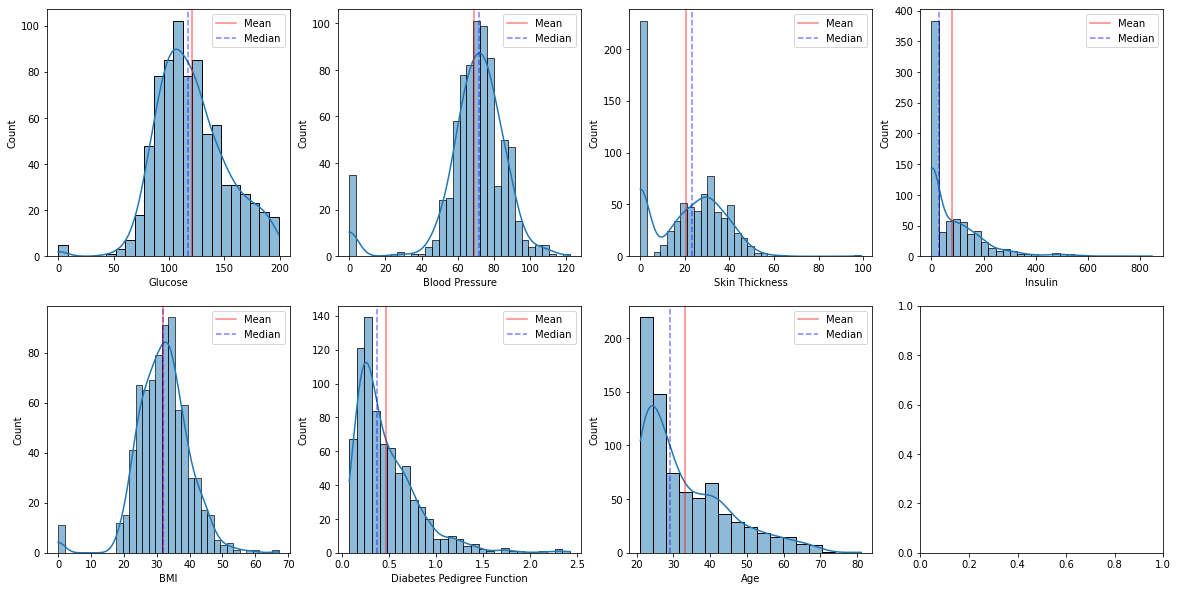

In [581]:
plt.figure(figsize = (20, 10))

sns.histplot(data = diabetes['Pregnancies'], kde = True)
plt.axvline(x=diabetes.Pregnancies.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes.Pregnancies.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,1)

sns.histplot(data = diabetes['Glucose'], kde = True)
plt.axvline(x=diabetes.Glucose.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes.Glucose.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,2)

sns.histplot(data = diabetes['Blood Pressure'], kde = True)
plt.axvline(x=diabetes["Blood Pressure"].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes["Blood Pressure"].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,3)

sns.histplot(data = diabetes['Skin Thickness'], kde = True, binwidth = 3)
plt.axvline(x=diabetes['Skin Thickness'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes['Skin Thickness'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,4)

sns.histplot(data = diabetes['Insulin'], kde = True)
plt.axvline(x=diabetes['Insulin'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes['Insulin'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,5)

sns.histplot(data = diabetes['BMI'], kde = True)
plt.axvline(x=diabetes['BMI'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes['BMI'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,6)

sns.histplot(data = diabetes['Diabetes Pedigree Function'], kde = True)
plt.axvline(x=diabetes['Diabetes Pedigree Function'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes['Diabetes Pedigree Function'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,7)

sns.histplot(data = diabetes['Age'], kde = True)
plt.axvline(x=diabetes['Age'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes['Age'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,8)

plt.show()

**Observations:**

We can find Glucose, Blood Pressure , Skin Thickness(Tricep skin fold thickness), Insulin, BMI,  as 0 which is not possible. Must Treat them as missing values

0.0    500
1.0    268
Name: Outcome, dtype: int64


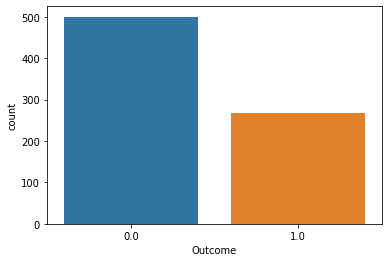

In [582]:
sns.countplot(data= diabetes, x= "Outcome")  # 0 = Non diabetic, 1 = Diabetic
print( diabetes["Outcome"].value_counts())

In [583]:
# Replacing 0's with NaN in all columns except Pregnancies and Outcome, as it can have 0 as a value 
diabetes.loc[:,"Glucose":"BMI"] = diabetes.loc[:,"Glucose":"BMI"].replace(0, np.nan)
diabetes.head(5)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


#### Dealing with null values

In [584]:
diabetes.loc[:,:"Age"].isnull().mean()*100
# Dropping null values for columns having <1% null values.

Pregnancies                    0.000000
Glucose                        0.651042
Blood Pressure                 4.557292
Skin Thickness                29.557292
Insulin                       48.697917
BMI                            1.432292
Diabetes Pedigree Function     0.000000
Age                            0.000000
dtype: float64

**An insulin in blood test is sometimes used along with other tests to help diagnose and monitor type 1 diabetes but It's having 48.6 % null values.**   

In [585]:
# Creating new data frame and dropping the column Insulin and null values for column glucose
diabetes_1 = diabetes.drop("Insulin", axis= 1) 
diabetes_1 = diabetes_1.dropna(axis= 0, subset= ["Glucose"])
diabetes_1.head(5)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,43.1,2.288,33.0,1.0


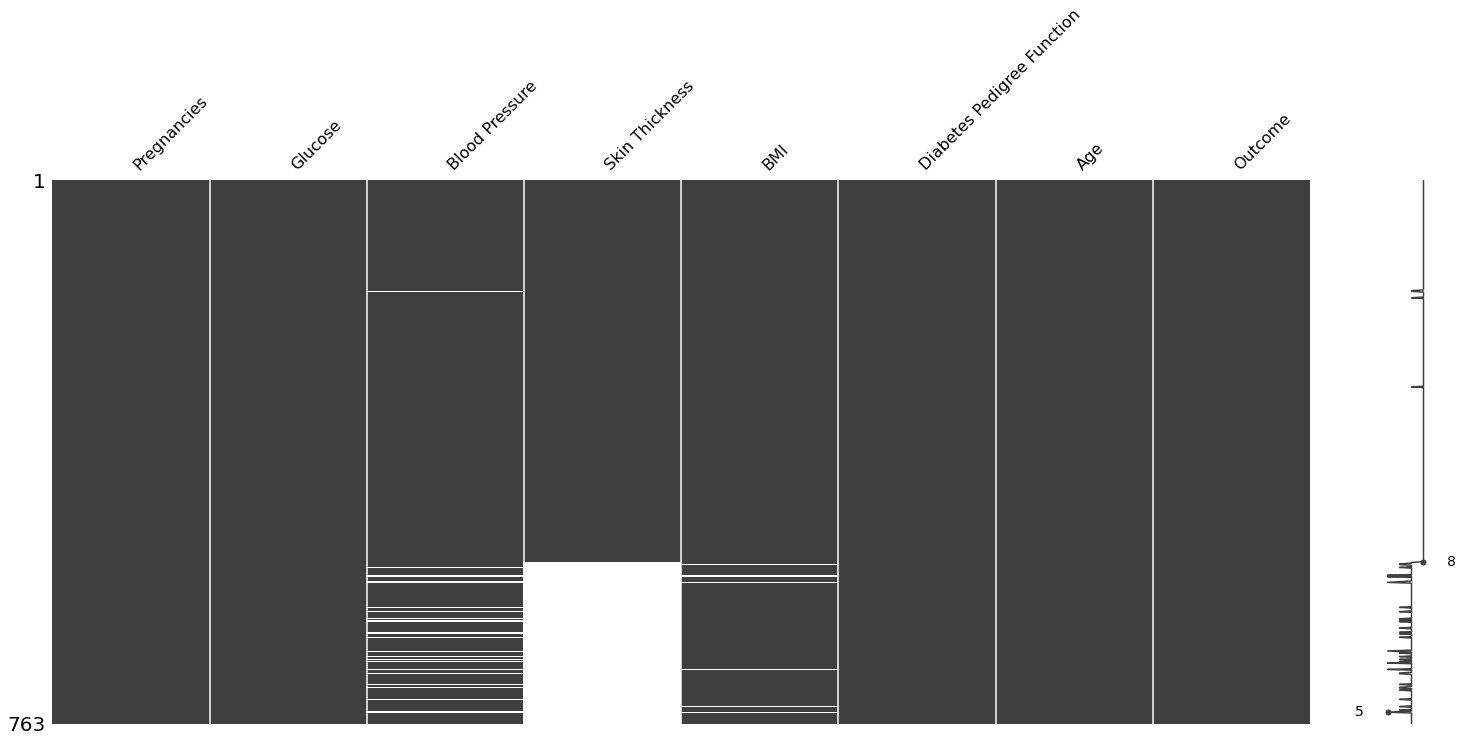

In [586]:
# Visualisation to see missing values in all columns
no.matrix(diabetes_1.sort_values("Skin Thickness"),)

##### Filling the null values
- **blood pressure, BMI** can be filled with mean/median as it is having only 4% and 1.4% missing values and these follows normal distribution.
- **Skin Thickness** is related to (BMI) body fat %  and having 28.5% missing values. So better to go with advance imputation technique 
 

Now we conclude that, we have to go for advance imputation techniques.

In [587]:
# splitting the target variable
d_target = diabetes_1["Outcome"]

In [588]:
#!pip install fancyimpute
from fancyimpute import SimilarityWeightedAveraging
swa = SimilarityWeightedAveraging()

# selecting variables only imputations
diabetes_1_swa = diabetes_1.iloc[:,:-1].copy(deep=True)
diabetes_1_swa.iloc[:, :] = swa.fit_transform(diabetes_1_swa)

import fancyimpute
from fancyimpute import IterativeImputer
MICE = IterativeImputer()

diabetes_1_MICE = diabetes_1.iloc[:,:-1].copy(deep=True)
diabetes_1_MICE.iloc[:, :] = MICE.fit_transform(diabetes_1_MICE)

import fancyimpute
from fancyimpute import SoftImpute
sf = SoftImpute()

diabetes_1_sf = diabetes_1.iloc[:,:-1].copy(deep=True)
diabetes_1_sf.iloc[:, :] = sf.fit_transform(diabetes_1_sf)

[SoftImpute] Max Singular Value of X_init = 4192.320516
[SoftImpute] Iter 1: observed MAE=1.957621 rank=5
[SoftImpute] Iter 2: observed MAE=1.979785 rank=5
[SoftImpute] Iter 3: observed MAE=1.996933 rank=5
[SoftImpute] Iter 4: observed MAE=2.011383 rank=5
[SoftImpute] Iter 5: observed MAE=2.024278 rank=5
[SoftImpute] Iter 6: observed MAE=2.035611 rank=5
[SoftImpute] Iter 7: observed MAE=2.045869 rank=5
[SoftImpute] Iter 8: observed MAE=2.054498 rank=5
[SoftImpute] Iter 9: observed MAE=2.061324 rank=5
[SoftImpute] Iter 10: observed MAE=2.066355 rank=5
[SoftImpute] Iter 11: observed MAE=2.069819 rank=5
[SoftImpute] Iter 12: observed MAE=2.072083 rank=5
[SoftImpute] Iter 13: observed MAE=2.073635 rank=5
[SoftImpute] Iter 14: observed MAE=2.074739 rank=5
[SoftImpute] Iter 15: observed MAE=2.075384 rank=5
[SoftImpute] Iter 16: observed MAE=2.075842 rank=5
[SoftImpute] Iter 17: observed MAE=2.076181 rank=5
[SoftImpute] Iter 18: observed MAE=2.076386 rank=5
[SoftImpute] Iter 19: observed MAE=

In [589]:
# Creating data frame for the values obtained from different imputation techniques
x_df = pd.concat( [diabetes_1["Skin Thickness"], diabetes_1_swa["Skin Thickness"], diabetes_1_MICE["Skin Thickness"],
                   diabetes_1_sf["Skin Thickness"]] , axis= 1)
x_df.columns = ["No Imputation", "SWA Imputation", "MICE Imputation", "SoftImpute"]

# Plotting the distribution of Skin Thickness from different imputation techniques
px.box(x_df, y= ["No Imputation", "SWA Imputation", "MICE Imputation", "SoftImpute"] 
       , title= "Distribution of Skin Thickness from imputation techniques" )

**Observation** :
MICE Imputation seems to be better imputation technique for the given data.

so. I've choosen MICE imputation

In [590]:
# Creating new dataframe with imputed values
diabetes_2 = pd.concat([diabetes_1_MICE, d_target], axis= 1)

Now checking the distribution of all variables

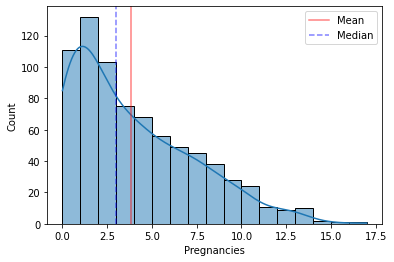

In [591]:
sns.histplot(data = diabetes_2['Pregnancies'], kde = True, binwidth = 1)                 # binwidth set as 1 
plt.axvline(x=diabetes_2['Pregnancies'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes_2['Pregnancies'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

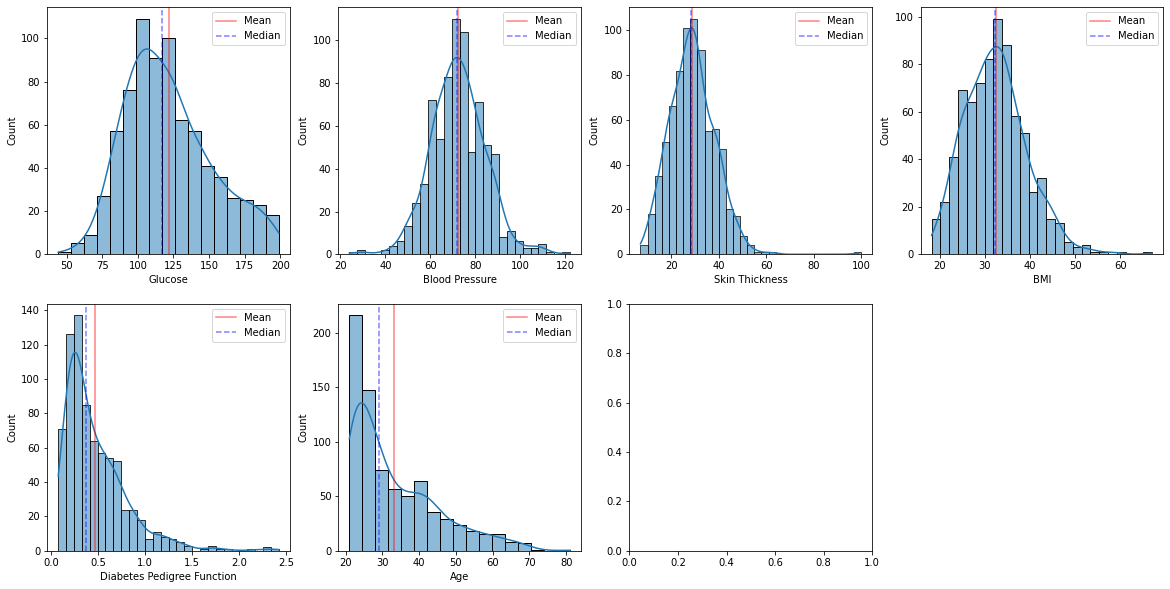

In [592]:
plt.figure(figsize = (20, 10))

sns.histplot(data = diabetes_2['Pregnancies'], kde = True)
plt.axvline(x=diabetes_2.Pregnancies.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes_2.Pregnancies.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,1)

sns.histplot(data = diabetes_2['Glucose'], kde = True)
plt.axvline(x=diabetes_2.Glucose.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes_2.Glucose.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,2)

sns.histplot(data = diabetes_2['Blood Pressure'], kde = True)
plt.axvline(x=diabetes_2["Blood Pressure"].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes_2["Blood Pressure"].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,3)

sns.histplot(data = diabetes_2['Skin Thickness'], kde = True, binwidth = 3)
plt.axvline(x=diabetes_2['Skin Thickness'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes_2['Skin Thickness'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,4)

sns.histplot(data = diabetes_2['BMI'], kde = True)
plt.axvline(x=diabetes_2['BMI'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes_2['BMI'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,5)

sns.histplot(data = diabetes_2['Diabetes Pedigree Function'], kde = True)
plt.axvline(x=diabetes_2['Diabetes Pedigree Function'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes_2['Diabetes Pedigree Function'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,6)

sns.histplot(data = diabetes_2['Age'], kde = True)
plt.axvline(x=diabetes_2['Age'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes_2['Age'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
plt.subplot(2,4,7)

plt.show()

#### Exploring the data

In [593]:
# Mapping names to the Outcome variable
diabetes_2["Outcome"]= diabetes_2["Outcome"].map( {0: "Non-Diabetic", 1: "Diabetic"} )

##### Aim: To check whether more number of pregnancies will cause diabetes

In [594]:
# Discretization of BMI column -(for BMI (< 18.5 Underweight, 18.5—24.9 Healthy Weight, 25.0—29.9 Overweight, > 30.0 Obesity))
diabetes_2["Weight_Category"] = pd.cut(x= diabetes_2['BMI'], bins=[1, 18.5, 25, 30, 100], labels=['Under_wieght', 'Healthy', 'Over_weight', "Obesity"])


In [595]:
# To check the distribution pregnacies column
px.box(diabetes_2, y = "Pregnancies",color = "Outcome", facet_col= "Weight_Category", width = 1000, height = 400,
       title= "Distribution of number of pregnancies (0 - Non diabetic, 1 - diabetic)")

**Observation**: 

**1)** Increase in weight resulting increase in diabetic cases

**2)** Women with pregnancies more than 2 and having more weight are more prone to be diabetic 


##### Aim: To check the relation between glucose levels and diabetes

In [596]:
px.box(diabetes_2, y= "Glucose", color= "Outcome",
        title= "Distribution of Glucose levels (0- Non diabetic, 1- Diabetic)", width= 800, height= 500)

**Observation**: 
Diabetic people are having higher glucose levels compared to non - diabetic.

(155 mg/dL or lower - normal, otherwise - prediabetes)

##### Aim: To check relation between blood pressure and diabetes.

In [597]:
px.box(diabetes_2, y= "Blood Pressure", color= "Outcome", facet_col= "Weight_Category",
        title= "Distribution of Blood Pressure (0- Non diabetic, 1- Diabetic)", width= 1200, height= 500)

**Observation**: 

**1)**Obese people are having abnormal BP values compared to remaining.


**2)**Diabetic people are having slightly higher BP than non diabetic.


Blood Pressure: Diastolic blood pressure (mm Hg) (60 to 80 - normal, otherwise - hypotension, Hypertension)

##### Aim: To check the relation between skin thickness and diabetes

In [598]:
px.scatter(diabetes_2, y= "Skin Thickness", x= "BMI", color= "Outcome",
        title= "Scatterplot for skin thickness and BMI (0- Non diabetic, 1- Diabetic)", width= 800, height= 500)

People are more prone to diabetes when there's increase in skin thickness and BMI

In [599]:
px.scatter(diabetes_2, y= "Skin Thickness", x= "Glucose", color= "Outcome",
        title= "Scatterplot for skin thickness and Glucose (0- Non diabetic, 1- Diabetic)", width= 800, height= 500)

**Observation**: 

**1)** People are more prone to diabetes when there's increase in skin thickness and BMI with glucose greater than normal level (155).

**2)** Linear relationship between skin thickness and BMI

Skin Thickness: Triceps skin fold thickness (mm) (Average value is 23.6 ± 7.5 mm for women)

##### Aim: To find the relationship between BMI and outcome

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



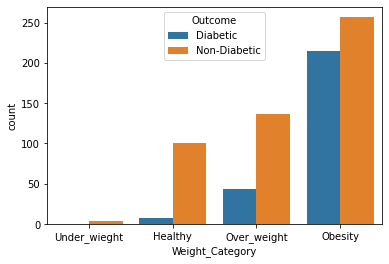

In [600]:
## Discretization of BMI column -(for BMI (< 18.5 Underweight, 18.5—24.9 Healthy Weight, 25.0—29.9 Overweight, > 30.0 Obesity))

sns.countplot(diabetes_2["Weight_Category"], hue= diabetes_2["Outcome"])

**Observation**:

In the given dataset ( Non-diabetic - 497, Diabetic - 266 ). Here more number of diabetic people fall under category Obese.

##### Aim: To find the relationship between Diabetes pedigree function and outcome

In [601]:
px.box(diabetes_2, y= "Diabetes Pedigree Function", color= "Outcome",
        title= "Distribution of diabetes pedigree function (0- Non diabetic, 1- Diabetic)", width= 800, height= 500)

**Observation**:
Diabetes pedigree function (indicates the function which scores likelihood of diabetes based on family history) values are higher for diabetic people. 

##### Aim: To find relation between age and outcome

In [602]:
# Discretization of age column
diabetes_2["Age_category"] = pd.cut( diabetes_2["Age"] , bins= [0, 39, 59, 90], labels= ["Young adults", "Middle-aged adults",
                                                                                         "Old adults"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



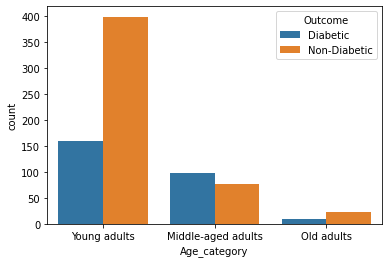

In [603]:
sns.countplot(diabetes_2["Age_category"], hue= diabetes_2["Outcome"])

**Observation** 

In the given data, more diabetic people were found to be Young adults (age<40 )

In [604]:
## dropping the columns Weight category, age category
diabetes_2.drop( ["Weight_Category", "Age_category"] , axis= 1, inplace= True)

## Conclusion:
1) women with over weight & pregnancies more than 2 are more prone to diabetic.

2) Few women (Non-Diabetic) were found with higher glucose levels. They are in prediabetes stage.

3) Diabetic & Obese women are having slightly higher & abnorml blood pressue values compared to non diabetic & healthy women. 

4) diabetic were found more when they are having Obesity with Glucose greater than normal (150) 

5) More number of diabetic people were found with age less than 40 and having Obesity.